# Data Binning
Following script is used to bin the data and check stats of participants

In [1]:
import pandas as pd
import numpy as np
import json
import string

In [311]:
df = pd.read_csv('/home1/varunk/data/ABIDE1/RawDataBIDs/composite_phenotypic_file.csv') # , index_col='SUB_ID'

df = df.sort_values(['SUB_ID'])

In [312]:
df

,SITE_ID,SUB_ID,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,...,WISC_IV_BLK_DSN_SCALED,WISC_IV_PIC_CON_SCALED,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI
489,PITT,50002,1,1,16.77,1,Ambi,NaN,103.0,116.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
490,PITT,50003,1,1,24.45,1,R,NaN,124.0,128.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
491,PITT,50004,1,1,19.09,1,R,NaN,113.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
492,PITT,50005,1,1,13.73,2,R,NaN,119.0,117.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
493,PITT,50006,1,1,13.37,1,L,NaN,109.0,99.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
494,PITT,50007,1,1,17.78,1,R,NaN,110.0,106.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
495,PITT,50008,1,1,32.45,1,R,NaN,123.0,123.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
496,PITT,50009,1,1,33.86,1,R,NaN,126.0,118.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
497,PITT,50010,1,1,35.20,1,L,NaN,81.0,81.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN
498,PITT,50011,1,1,16.93,1,L,NaN,111.0,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN


### Reading scan json files and extracting scan parameters

In [313]:
# saving the file paths
!find /home1/varunk/data/ABIDE1/RawDataBIDs/ -name 'task-rest_bold.json' > scan_params_file.txt


In [314]:
# read the above created file paths:

with open('scan_params_file.txt', 'r') as f:
    scan_param_paths = f.read().split('\n')[0:-1]


In [315]:
scan_param_paths

['/home1/varunk/data/ABIDE1/RawDataBIDs/UM_1/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Caltech/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_c/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_d/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/UM_2/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_b/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/CMU_a/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/NYU/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Stanford/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/CMU_b/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_a/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/Leuven_1/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/KKI/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawDataBIDs/USM/task-rest_bold.json',
 '/home1/varunk/data/ABIDE1/RawD

In [316]:

# for json_path in scan_param_paths:   
#     with open(json_path, 'rt') as fp:
#         task_info = json.load(fp)

#     # Accessing the contents:

#     tr = task_info['RepetitionTime']
#     volumes = task_info['NumberofMeasurements']
#     xdim_mm, ydim_mm = task_info['PixelSpacing'].split('x')
#     zdim_mm = task_info['SpacingBetweenSlices']
    
#     xdim_voxels, ydim_voxels = task_info['AcquisitionMatrix'].split('x')
#     zdim_voxels = task_info['NumberOfSlices']

### Convention:
**DX_GROUP** : 1=Autism, 2= Control

**DSM_IV_TR** : 0=TD,1=Autism,2=Asperger's, 3= PDD-NOS, 4=Asperger's or PDD-NOS

**SEX** : 1=Male, 2=Female

In [317]:
SITES = np.unique(df.as_matrix(['SITE_ID']).squeeze())
data_frame = pd.DataFrame({
'SITE_NAME': [] ,
'TR': [],
'VOLUMES': [],
'xdim_mm': [],
'ydim_mm': [],
'zdim_mm': [],
'xdim_voxels': [],
'ydim_voxels': [],
'zdim_voxels': [],    
'NUM_AUT_DSM_V': [] , 
'NUM_AUT_MALE_DSM_V': [] ,
'NUM_AUT_FEMALE_DSM_V': [],
'NUM_AUT_AGE_lte12_DSM_V' : [],
'NUM_AUT_AGE_12_18_DSM_V' : [],
'NUM_AUT_AGE_18_24_DSM_V': [],
'NUM_AUT_AGE_24_34_DSM_V' :[],
'NUM_AUT_AGE_34_50_DSM_V' : [],
'NUM_AUT_AGE_gt50_DSM_V' : [],
'NUM_AUT_DSM_IV' : [],
'NUM_AUT_MALE_DSM_IV' : [],
'NUM_AUT_FEMALE_DSM_IV' : [],
'NUM_ASP_DSM_IV' : [],
'NUM_ASP_MALE_DSM_IV' : [],
'NUM_ASP_FEMALE_DSM_IV' : [],
'NUM_PDDNOS_DSM_IV' : [],
'NUM_PDDNOS_MALE_DSM_IV' : [],
'NUM_PDDNOS_FEMALE_DSM_IV' : [],
'NUM_ASP_PDDNOS_DSM_IV' : [],
'NUM_ASP_PDDNOS_MALE_DSM_IV' : [],
'NUM_ASP_PDDNOS_FEMALE_DSM_IV' : [],
'NUM_TD' : [],
'NUM_TD_MALE' : [],
'NUM_TD_FEMALE' : [],
'NUM_TD_AGE_lte12' : [],
'NUM_TD_AGE_12_18' : [],
'NUM_TD_AGE_18_24' : [],
'NUM_TD_AGE_24_34' : [],
'NUM_TD_AGE_34_50' : [],
'NUM_TD_AGE_gt50' : []
                       
})

In [318]:
# NUM_AUT = 
# df.loc[(df['DSM_IV_TR'] != 0) & (df['DSM_IV_TR'] != 1) & (df['DSM_IV_TR'] != 2) & (df['DSM_IV_TR'] != 3) & (df['DSM_IV_TR'] != 4)]


for SITE in SITES:
    NUM_AUT_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_MALE_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['SEX'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_FEMALE_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['SEX'] == 2) & (df['SITE_ID'] == SITE)].shape[0]

    NUM_AUT_AGE_lte12_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['AGE_AT_SCAN'] <= 12) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_AGE_12_18_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['AGE_AT_SCAN'] > 12) & (df['AGE_AT_SCAN'] <= 18) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_AGE_18_24_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['AGE_AT_SCAN'] > 18) & (df['AGE_AT_SCAN'] <= 24) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_AGE_24_34_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['AGE_AT_SCAN'] > 24) & (df['AGE_AT_SCAN'] <= 34) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_AGE_34_50_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['AGE_AT_SCAN'] > 34) & (df['AGE_AT_SCAN'] <= 50) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_AGE_gt50_DSM_V = df.loc[(df['DX_GROUP'] == 1) & (df['AGE_AT_SCAN'] > 50 ) & (df['SITE_ID'] == SITE)].shape[0]


    NUM_AUT_DSM_IV = df.loc[(df['DSM_IV_TR'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_MALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 1) & (df['SEX'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_AUT_FEMALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 1) & (df['SEX'] == 2) & (df['SITE_ID'] == SITE)].shape[0]


    NUM_ASP_DSM_IV = df.loc[(df['DSM_IV_TR'] == 2) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_ASP_MALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 2) & (df['SEX'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_ASP_FEMALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 2) & (df['SEX'] == 2) & (df['SITE_ID'] == SITE)].shape[0]

    NUM_PDDNOS_DSM_IV = df.loc[(df['DSM_IV_TR'] == 3) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_PDDNOS_MALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 3) & (df['SEX'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_PDDNOS_FEMALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 3) & (df['SEX'] == 2) & (df['SITE_ID'] == SITE)].shape[0]

    NUM_ASP_PDDNOS_DSM_IV = df.loc[(df['DSM_IV_TR'] == 4) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_ASP_PDDNOS_MALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 4) & (df['SEX'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_ASP_PDDNOS_FEMALE_DSM_IV = df.loc[(df['DSM_IV_TR'] == 4) & (df['SEX'] == 2) & (df['SITE_ID'] == SITE)].shape[0]



    NUM_TD = df.loc[(df['DX_GROUP'] == 2) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_MALE = df.loc[(df['DX_GROUP'] == 2) & (df['SEX'] == 1) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_FEMALE = df.loc[(df['DX_GROUP'] == 2) & (df['SEX'] == 2) & (df['SITE_ID'] == SITE)].shape[0]

    NUM_TD_AGE_lte12 = df.loc[(df['DX_GROUP'] == 2) & (df['AGE_AT_SCAN'] <= 12) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_AGE_12_18 = df.loc[(df['DX_GROUP'] == 2) & (df['AGE_AT_SCAN'] > 12) & (df['AGE_AT_SCAN'] <= 18) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_AGE_18_24 = df.loc[(df['DX_GROUP'] == 2) & (df['AGE_AT_SCAN'] > 18) & (df['AGE_AT_SCAN'] <= 24) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_AGE_24_34 = df.loc[(df['DX_GROUP'] == 2) & (df['AGE_AT_SCAN'] > 24) & (df['AGE_AT_SCAN'] <= 34) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_AGE_34_50 = df.loc[(df['DX_GROUP'] == 2) & (df['AGE_AT_SCAN'] > 34) & (df['AGE_AT_SCAN'] <= 50) & (df['SITE_ID'] == SITE)].shape[0]
    NUM_TD_AGE_gt50 = df.loc[(df['DX_GROUP'] == 2) & (df['AGE_AT_SCAN'] > 50 ) & (df['SITE_ID'] == SITE)].shape[0]

    tr = 0
    volumes = 0
    xdim_mm = 0
    ydim_mm = 0
    zdim_mm = 0
    xdim_voxels = 0
    ydim_voxels = 0
    zdim_voxels = 0
    
    # Accessing scan details
    for json_path in scan_param_paths:
        extracted_site = json_path.split('/')[-2]
        
        if (SITE).lower() in (extracted_site).lower():    
            with open(json_path, 'rt') as fp:
                print('Site matched with ',json_path)
                task_info = json.load(fp)

    # Accessing the contents:

                tr = task_info['RepetitionTime']
                volumes = task_info['NumberofMeasurements']
                xdim_mm, ydim_mm = task_info['PixelSpacing'].split('x')
                zdim_mm = task_info['SpacingBetweenSlices']

                xdim_voxels, ydim_voxels = task_info['AcquisitionMatrix'].split('x')
                zdim_voxels = task_info['NumberOfSlices']
    
    
    _df = pd.DataFrame({
    'SITE_NAME': SITE ,
    'TR': tr ,
    'VOLUMES': volumes,
    'xdim_mm':xdim_mm,
    'ydim_mm':ydim_mm,
    'zdim_mm':zdim_mm,
    'xdim_voxels':xdim_voxels,
    'ydim_voxels':ydim_voxels,
    'zdim_voxels':zdim_voxels,
        
    'NUM_AUT_DSM_V': NUM_AUT_DSM_V , 
    'NUM_AUT_MALE_DSM_V': NUM_AUT_MALE_DSM_V ,
    'NUM_AUT_FEMALE_DSM_V': NUM_AUT_FEMALE_DSM_V,
    'NUM_AUT_AGE_lte12_DSM_V' : NUM_AUT_AGE_lte12_DSM_V,
    'NUM_AUT_AGE_12_18_DSM_V' : NUM_AUT_AGE_12_18_DSM_V,
    'NUM_AUT_AGE_18_24_DSM_V': NUM_AUT_AGE_18_24_DSM_V,
    'NUM_AUT_AGE_24_34_DSM_V' :NUM_AUT_AGE_24_34_DSM_V,
    'NUM_AUT_AGE_34_50_DSM_V' : NUM_AUT_AGE_34_50_DSM_V,
    'NUM_AUT_AGE_gt50_DSM_V' : NUM_AUT_AGE_gt50_DSM_V,
    'NUM_AUT_DSM_IV' : NUM_AUT_DSM_IV,
    'NUM_AUT_MALE_DSM_IV' : NUM_AUT_MALE_DSM_IV,
    'NUM_AUT_FEMALE_DSM_IV' : NUM_AUT_FEMALE_DSM_IV,
    'NUM_ASP_DSM_IV' : NUM_ASP_DSM_IV,
    'NUM_ASP_MALE_DSM_IV' : NUM_ASP_MALE_DSM_IV,
    'NUM_ASP_FEMALE_DSM_IV' : NUM_ASP_FEMALE_DSM_IV,
    'NUM_PDDNOS_DSM_IV' : NUM_PDDNOS_DSM_IV,
    'NUM_PDDNOS_MALE_DSM_IV' : NUM_PDDNOS_MALE_DSM_IV,
    'NUM_PDDNOS_FEMALE_DSM_IV' : NUM_PDDNOS_FEMALE_DSM_IV,
    'NUM_ASP_PDDNOS_DSM_IV' : NUM_ASP_PDDNOS_DSM_IV,
    'NUM_ASP_PDDNOS_MALE_DSM_IV' : NUM_ASP_PDDNOS_MALE_DSM_IV,
    'NUM_ASP_PDDNOS_FEMALE_DSM_IV' : NUM_ASP_PDDNOS_FEMALE_DSM_IV,
    'NUM_TD' : NUM_TD,
    'NUM_TD_MALE' : NUM_TD_MALE,
    'NUM_TD_FEMALE' : NUM_TD_FEMALE,
    'NUM_TD_AGE_lte12' : NUM_TD_AGE_lte12,
    'NUM_TD_AGE_12_18' : NUM_TD_AGE_12_18,
    'NUM_TD_AGE_18_24' : NUM_TD_AGE_18_24,
    'NUM_TD_AGE_24_34' : NUM_TD_AGE_24_34,
    'NUM_TD_AGE_34_50' : NUM_TD_AGE_34_50,
    'NUM_TD_AGE_gt50' : NUM_TD_AGE_gt50

    },index=[0],columns = [ 'SITE_NAME',
                            'TR',
                            'VOLUMES',
                            'xdim_mm',
                            'ydim_mm',
                            'zdim_mm',
                            'xdim_voxels',
                            'ydim_voxels',
                            'zdim_voxels',
                            'NUM_AUT_DSM_V',
                            'NUM_AUT_MALE_DSM_V',
                            'NUM_AUT_FEMALE_DSM_V',
                            'NUM_AUT_AGE_lte12_DSM_V',
                            'NUM_AUT_AGE_12_18_DSM_V',
                            'NUM_AUT_AGE_18_24_DSM_V',
                            'NUM_AUT_AGE_24_34_DSM_V',
                            'NUM_AUT_AGE_34_50_DSM_V',
                            'NUM_AUT_AGE_gt50_DSM_V',
                            'NUM_AUT_DSM_IV',
                            'NUM_AUT_MALE_DSM_IV',
                            'NUM_AUT_FEMALE_DSM_IV',
                            'NUM_ASP_DSM_IV',
                            'NUM_ASP_MALE_DSM_IV',
                            'NUM_ASP_FEMALE_DSM_IV',
                            'NUM_PDDNOS_DSM_IV',
                            'NUM_PDDNOS_MALE_DSM_IV',
                            'NUM_PDDNOS_FEMALE_DSM_IV',
                            'NUM_ASP_PDDNOS_DSM_IV',
                            'NUM_ASP_PDDNOS_MALE_DSM_IV',
                            'NUM_ASP_PDDNOS_FEMALE_DSM_IV',
                            'NUM_TD',
                            'NUM_TD_MALE',
                            'NUM_TD_FEMALE',
                            'NUM_TD_AGE_lte12',
                            'NUM_TD_AGE_12_18',
                            'NUM_TD_AGE_18_24',
                            'NUM_TD_AGE_24_34',
                            'NUM_TD_AGE_34_50',
                            'NUM_TD_AGE_gt50'])
    data_frame = data_frame.append(_df, ignore_index=True)[_df.columns.tolist()] 
    
    
#     df = pd.DataFrame(raw_data, columns = [])

# Sanity Check
# NUM_AUT_DSM_V.shape[0] + NUM_TD.shape[0]    
# df.loc[(df['DSM_IV_TR'] == 0)].shape[0] + NUM_AUT_DSM_V.shape[0] # Not exhaustive

Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Caltech/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/CMU_a/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/CMU_b/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/KKI/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Leuven_1/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Leuven_2/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_c/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_d/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_b/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/Max_Mun_a/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/NYU/task-rest_bold.json
Site matched with  /home1/varunk/data/ABIDE1/RawDataBIDs/OHSU/task-

In [319]:
# 'MAX_MUN'.lower() in '/home1/varunk/data/ABIDE1/RawDataBIDs/MaxMun_a/task-rest_bold.json'.lower()

False

In [320]:
_df

,SITE_NAME,TR,VOLUMES,xdim_mm,ydim_mm,zdim_mm,xdim_voxels,ydim_voxels,zdim_voxels,NUM_AUT_DSM_V,...,NUM_ASP_PDDNOS_FEMALE_DSM_IV,NUM_TD,NUM_TD_MALE,NUM_TD_FEMALE,NUM_TD_AGE_lte12,NUM_TD_AGE_12_18,NUM_TD_AGE_18_24,NUM_TD_AGE_24_34,NUM_TD_AGE_34_50,NUM_TD_AGE_gt50
0,YALE,2.0,200.0,3.4,3.4,4.0,64,64,34.0,28,...,0,28,20,8,11,17,0,0,0,0


In [321]:
data_frame

,SITE_NAME,TR,VOLUMES,xdim_mm,ydim_mm,zdim_mm,xdim_voxels,ydim_voxels,zdim_voxels,NUM_AUT_DSM_V,...,NUM_ASP_PDDNOS_FEMALE_DSM_IV,NUM_TD,NUM_TD_MALE,NUM_TD_FEMALE,NUM_TD_AGE_lte12,NUM_TD_AGE_12_18,NUM_TD_AGE_18_24,NUM_TD_AGE_24_34,NUM_TD_AGE_34_50,NUM_TD_AGE_gt50
0,CALTECH,2.000,150.0,3.5,3.5,3.500,64,64,34.0,19.0,...,1.0,19.0,15.0,4.0,0.0,1.0,10.0,2.0,5.0,1.0
1,CMU,1.500,240.0,3,3,4.500,64,64,21.0,14.0,...,0.0,13.0,10.0,3.0,0.0,0.0,4.0,8.0,1.0,0.0
2,KKI,2.500,156.0,3.05,3.15,3.000,84,81,47.0,22.0,...,0.0,33.0,24.0,9.0,30.0,3.0,0.0,0.0,0.0,0.0
3,LEUVEN_1,1.667,250.0,3.59,3.59,4.000,64,64,32.0,14.0,...,0.0,15.0,15.0,0.0,0.0,1.0,10.0,4.0,0.0,0.0
4,LEUVEN_2,1.667,250.0,3.59,3.59,4.000,64,64,32.0,15.0,...,0.0,20.0,15.0,5.0,0.0,20.0,0.0,0.0,0.0,0.0
5,MAX_MUN,3.000,120.0,3,3,4.400,64,64,28.0,24.0,...,0.0,33.0,29.0,4.0,4.0,2.0,8.0,15.0,4.0,0.0
6,NYU,2.000,180.0,3,3,4.000,80,64,33.0,79.0,...,0.0,105.0,79.0,26.0,33.0,41.0,20.0,11.0,0.0,0.0
7,OHSU,2.500,82.0,3.8,3.8,3.800,64,64,36.0,13.0,...,0.0,15.0,15.0,0.0,15.0,0.0,0.0,0.0,0.0,0.0
8,OLIN,1.500,210.0,3.4,3.4,5.000,64,64,29.0,20.0,...,0.0,16.0,14.0,2.0,1.0,9.0,6.0,0.0,0.0,0.0
9,PITT,1.500,200.0,3.1,3.1,4.000,64,64,29.0,30.0,...,0.0,27.0,23.0,4.0,2.0,13.0,6.0,6.0,0.0,0.0


In [323]:
# Save the csv file
data_frame.to_csv('demographics.csv')

## Group Stats
* The follwoing section checks the stats of participants lying in the ollwoing bins:
    * Autistic(DSM-IV), Males, Age <=18, Eyes Closed
    * Autistic(DSM-IV), Males, Age <=18, Eyes Open
    

In [5]:
# df = pd.read_csv('/home1/varunk/data/ABIDE1/RawDataBIDs/composite_phenotypic_file.csv') # , index_col='SUB_ID'

# df = df.sort_values(['SUB_ID'])

# df_td_lt18_m_eyesopen = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 0) & (df['EYE_STATUS_AT_SCAN'] == 1)]
# df_td_lt18_m_eyesopen;

# df_td_lt18_m_eyesclosed = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 0) & (df['EYE_STATUS_AT_SCAN'] == 2)]
# df_td_lt18_m_eyesclosed;



In [6]:
# df_td_lt18_m_eyesopen;
# df_td_lt18_m_eyesclosed;

In [7]:
# Reading TR values
tr_path = '/home1/varunk/results_again_again/ABIDE1_Preprocess_Datasink/tr_paths/tr_list.npy'
tr = np.load(tr_path)

In [31]:
np.unique(tr)

array([ 1.5  ,  1.667,  2.   ,  2.2  ,  2.5  ,  3.   ])

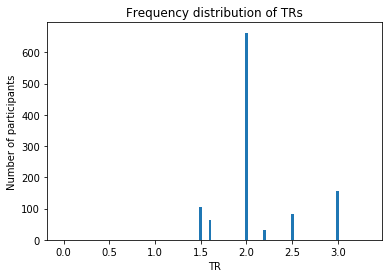

In [43]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

bins = np.arange(0,3.5,0.1)
res = plt.hist(tr, rwidth=0.3, align='left', bins= bins)
# plt.xticks([0,0.5,1,1.5,2,2.5,3])

plt.xlabel('TR')
plt.ylabel('Number of participants')
plt.title('Frequency distribution of TRs')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')


In [37]:
np.unique(tr)


array([ 1.5  ,  1.667,  2.   ,  2.2  ,  2.5  ,  3.   ])

In [94]:
df = pd.read_csv('/home1/varunk/data/ABIDE1/RawDataBIDs/composite_phenotypic_file.csv') # , index_col='SUB_ID'

df = df.sort_values(['SUB_ID'])

df_td_lt18_m_eyesopen = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 0) & (df['EYE_STATUS_AT_SCAN'] == 1)]
df_td_lt18_m_eyesopen;

df_td_lt18_m_eyesclosed = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 0) & (df['EYE_STATUS_AT_SCAN'] == 2)]
df_td_lt18_m_eyesclosed;

df_aut_lt18_m_eyesopen = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 1) & (df['EYE_STATUS_AT_SCAN'] == 1)]
df_aut_lt18_m_eyesopen;

df_aut_lt18_m_eyesclosed = df.loc[(df['SEX'] == 1) & (df['AGE_AT_SCAN'] <=18) & (df['DSM_IV_TR'] == 1) & (df['EYE_STATUS_AT_SCAN'] == 2)]
df_aut_lt18_m_eyesclosed;

In [95]:
df_td_lt18_m_eyesopen_sub_id = df_td_lt18_m_eyesopen.as_matrix(['SUB_ID']).squeeze()
df_td_lt18_m_eyesclosed_sub_id = df_td_lt18_m_eyesclosed.as_matrix(['SUB_ID']).squeeze()

df_aut_lt18_m_eyesopen_sub_id = df_aut_lt18_m_eyesopen.as_matrix(['SUB_ID']).squeeze()
df_aut_lt18_m_eyesclosed_sub_id = df_aut_lt18_m_eyesclosed.as_matrix(['SUB_ID']).squeeze()

In [73]:
import re
sub_id = []
atlas_paths = np.load('/home1/varunk/results_again_again/ABIDE1_Preprocess_Datasink/atlas_paths/atlas_file_list.npy')

for path in atlas_paths:
    sub_id_extracted = re.search('.+_subject_id_(\d+)', path).group(1)
    sub_id.append(sub_id_extracted)

In [79]:
sub_id = list(map(int, sub_id))

In [68]:
# df_sub_id = df.as_matrix(['SUB_ID']).squeeze()

In [70]:
# tr[np.where(df_sub_id == df_td_lt18_m_eyesopen_sub_id)]

/root/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.


array([], dtype=float64)

In [84]:
# np.isin(sub_id,df_td_lt18_m_eyesopen_sub_id)

array([False, False, False, ..., False, False, False], dtype=bool)

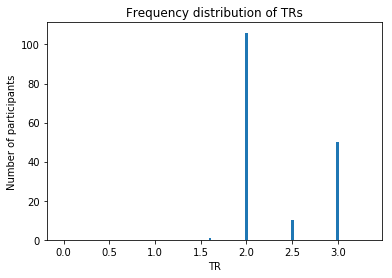

In [96]:
tr1 = tr[np.isin(sub_id, df_aut_lt18_m_eyesopen_sub_id)]

bins = np.arange(0,3.5,0.1)
res = plt.hist(tr1, rwidth=0.3, align='left', bins= bins)
# plt.xticks([0,0.5,1,1.5,2,2.5,3])

plt.xlabel('TR')
plt.ylabel('Number of participants')
plt.title('Frequency distribution of TRs')




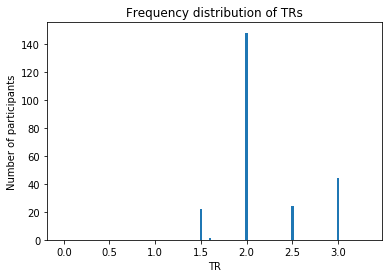

In [97]:
tr2 = tr[np.isin(sub_id, df_td_lt18_m_eyesopen_sub_id)]
bins = np.arange(0,3.5,0.1)
res = plt.hist(tr2, rwidth=0.3, align='left', bins= bins)
# plt.xticks([0,0.5,1,1.5,2,2.5,3])

plt.xlabel('TR')
plt.ylabel('Number of participants')
plt.title('Frequency distribution of TRs')

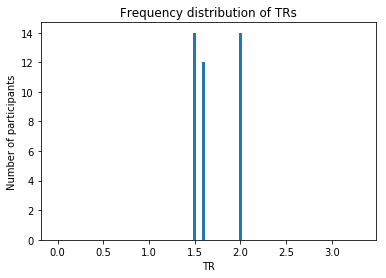

In [98]:
tr3 = tr[np.isin(sub_id, df_aut_lt18_m_eyesclosed_sub_id)]

bins = np.arange(0,3.5,0.1)
res = plt.hist(tr3, rwidth=0.3, align='left', bins= bins)
# plt.xticks([0,0.5,1,1.5,2,2.5,3])

plt.xlabel('TR')
plt.ylabel('Number of participants')
plt.title('Frequency distribution of TRs')




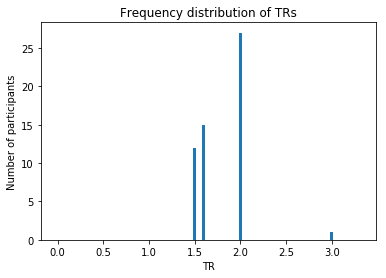

In [99]:
tr4 = tr[np.isin(sub_id, df_td_lt18_m_eyesclosed_sub_id)]

bins = np.arange(0,3.5,0.1)
res = plt.hist(tr4, rwidth=0.3, align='left', bins= bins)
# plt.xticks([0,0.5,1,1.5,2,2.5,3])

plt.xlabel('TR')
plt.ylabel('Number of participants')
plt.title('Frequency distribution of TRs')



## AGE

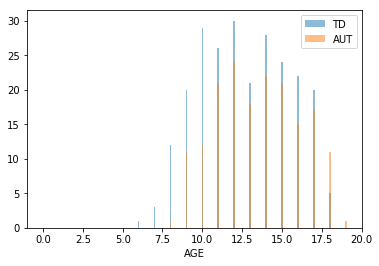

In [122]:
df_td_lt18_m_eyesopen_age = df_td_lt18_m_eyesopen.as_matrix(['AGE_AT_SCAN']).squeeze() 
df_td_lt18_m_eyesclosed_age = df_td_lt18_m_eyesclosed.as_matrix(['AGE_AT_SCAN']).squeeze()

df_aut_lt18_m_eyesopen_age = df_aut_lt18_m_eyesopen.as_matrix(['AGE_AT_SCAN']).squeeze()
df_aut_lt18_m_eyesclosed_age = df_aut_lt18_m_eyesclosed.as_matrix(['AGE_AT_SCAN']).squeeze()

bins = np.arange(0,20,1)
# res = plt.hist(df_td_lt18_m_eyesopen_age, rwidth=0.3, align='left')
# res2 = plt.hist(df_aut_lt18_m_eyesopen_age, rwidth=0.3, align='left', bins= bins)
# # plt.xticks([0,0.5,1,1.5,2,2.5,3])

# plt.xlabel('TR')
# plt.ylabel('Number of participants')
# plt.title('Frequency distribution of TRs')


# import random
# import numpy
from matplotlib import pyplot

# x = [random.gauss(3,1) for _ in range(400)]
# y = [random.gauss(4,2) for _ in range(400)]

# bins = numpy.linspace(-10, 10, 100)

pyplot.hist(df_td_lt18_m_eyesopen_age, alpha=0.5,bins=bins, label='TD',rwidth=0.1, align='left')
pyplot.hist(df_aut_lt18_m_eyesopen_age,alpha=0.5, bins=bins, label='AUT',rwidth=0.1,align='right')
pyplot.legend(loc='upper right')
pyplot.xlabel('AGE')
pyplot.show()

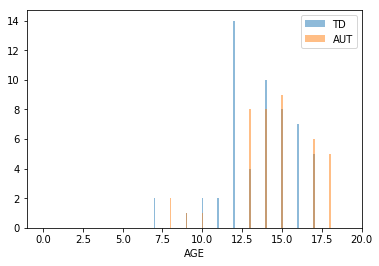

In [123]:

pyplot.hist(df_td_lt18_m_eyesclosed_age, alpha=0.5,bins=bins, label='TD',rwidth=0.1, align='left')
pyplot.hist(df_aut_lt18_m_eyesclosed_age,alpha=0.5, bins=bins, label='AUT',rwidth=0.1,align='right')
pyplot.legend(loc='upper right')
pyplot.xlabel('AGE')
pyplot.show()

### Box Plots:
https://www.wellbeingatschool.org.nz/information-sheet/understanding-and-interpreting-box-plots

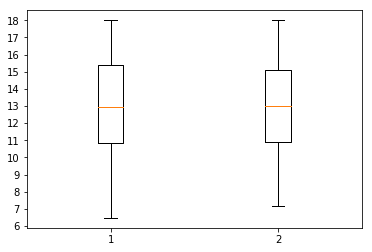

In [144]:
pyplot.yticks(np.arange(0,20,1))
res = pyplot.boxplot([df_td_lt18_m_eyesopen_age,df_aut_lt18_m_eyesopen_age])


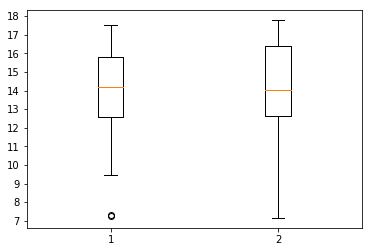

In [146]:
pyplot.yticks(np.arange(0,20,1))
res = pyplot.boxplot([df_td_lt18_m_eyesclosed_age, df_aut_lt18_m_eyesclosed_age])

### Eyes Open vs Closed

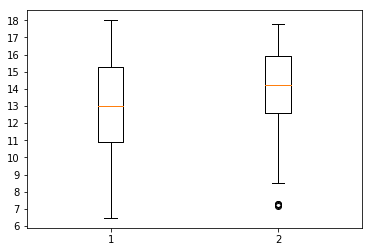

In [156]:
eyes_open_age = np.concatenate((df_td_lt18_m_eyesopen_age,df_aut_lt18_m_eyesopen_age))
eyes_closed_age = np.concatenate((df_td_lt18_m_eyesclosed_age,df_aut_lt18_m_eyesclosed_age))
pyplot.yticks(np.arange(0,20,1))
res = pyplot.boxplot([eyes_open_age, eyes_closed_age])

### Stats: Differences in Ages of closed vs open

In [157]:
from scipy import stats
stats.ttest_ind(eyes_open_age,eyes_closed_age, equal_var = False)

Ttest_indResult(statistic=-3.2079204110150714, pvalue=0.0016334737441666396)

#### Mean Age is significantly different in two groups. That may be the reason for discrepancies in regions. 

### Stats: Differences in TR of closed vs open

In [161]:
# stats.ttest_ind(eyes_open_age,eyes_closed_age, equal_var = False)

eyes_open_tr = np.concatenate((tr1,tr2))
eyes_closed_tr = np.concatenate((tr3,tr4))
stats.ttest_ind(eyes_open_tr,eyes_closed_tr, equal_var = False)

Ttest_indResult(statistic=13.635287744840932, pvalue=2.5595564163248784e-32)

#### TRs of two groups are also significantly different

In [163]:
np.mean(eyes_open_tr), np.mean(eyes_closed_tr)

(2.244665024630542, 1.7790421052631578)

In [148]:
df_td_lt18_m_eyesopen_age

array([ 14.    ,  14.    ,  16.    ,  17.    ,  10.    ,  13.    ,
        14.    ,  17.    ,  15.    ,  15.    ,  15.    ,  12.    ,
        17.    ,  18.    ,  17.    ,  16.    ,  12.    ,  18.    ,
        16.    ,  11.    ,  18.    ,  12.    ,  14.75  ,  13.35  ,
        12.58  ,  12.91  ,  14.98  ,  15.28  ,  15.53  ,  13.88  ,
        12.08  ,  16.05  ,  14.86  ,  16.57  ,  16.6   ,  16.13  ,
        14.76  ,  12.9   ,  15.3   ,  17.4   ,  17.1   ,  16.1   ,
        17.2   ,  10.4   ,  10.2   ,  11.    ,  17.8   ,  11.8   ,
        18.    ,  12.6   ,  17.3   ,  15.6   ,  12.4   ,  16.8   ,
        15.5   ,  10.9   ,   9.8   ,  10.4   ,  13.9   ,  11.2   ,
         9.8   ,  10.8   ,  15.6   ,   8.2   ,  10.8   ,  17.9   ,
        12.8   ,  12.2   ,  10.2   ,   9.2   ,  11.5   ,  11.6   ,
        16.5   ,  14.4   ,  17.8   ,  17.8   ,  14.    ,  14.5   ,
        17.2   ,  17.6   ,  14.8   ,  13.3   ,  14.9   ,  15.8   ,
        15.4   ,  14.8   ,  14.1   ,  17.9   ,  16.6   ,  13.6

In [76]:
df_td_lt18_m_eyesopen_sub_id

array([50102, 50103, 50104, 50105, 50106, 50110, 50111, 50112, 50116,
       50118, 50120, 50122, 50123, 50124, 50126, 50128, 50129, 50130,
       50132, 50133, 50134, 50135, 50193, 50194, 50195, 50196, 50197,
       50198, 50199, 50200, 50202, 50203, 50204, 50209, 50210, 50211,
       50214, 50217, 50327, 50328, 50329, 50330, 50331, 50332, 50333,
       50334, 50335, 50337, 50339, 50342, 50345, 50347, 50350, 50351,
       50352, 50355, 50358, 50359, 50360, 50362, 50363, 50364, 50365,
       50366, 50367, 50368, 50370, 50371, 50372, 50376, 50377, 50378,
       50381, 50383, 50385, 50386, 50387, 50390, 50391, 50415, 50416,
       50417, 50418, 50419, 50421, 50422, 50423, 50424, 50425, 50426,
       50427, 50428, 50435, 50436, 50437, 50438, 50443, 50447, 50448,
       50451, 50453, 50456, 50460, 50461, 50464, 50470, 50551, 50552,
       50553, 50554, 50556, 50559, 50560, 50561, 50562, 50564, 50566,
       50567, 50568, 50570, 50571, 50573, 50574, 50575, 50577, 50578,
       50701, 50772,

In [55]:
tr[637]

2.5

In [62]:
'50003' in X[1]

True